###About Dataset<br>
Note: Don't forget to upvote when you find this useful.

<b>Dataset Overview:</b><br>
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

Key Features of the Dataset:<br>
Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

Dataset Columns:<br>
Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.
Daily Steps: The number of steps the person takes per day.<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).<br>

Details about Sleep Disorder Column:<br>

None: The individual does not exhibit any specific sleep disorder.
Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.
Acknowledgement:

I would like to clarify that the data I am presenting is synthetic and created by me for illustrative purposes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
# df[['Left BP', 'Right BP']] = df['Blood Pressure'].str.split('/', expand=True)
# df.head()

In [6]:
# Splitting 'Blood Pressure' column
df1[['Left BP', 'Right BP']] = df1['Blood Pressure'].str.split('/', expand=True)

# Drop original 'Blood Pressure' column
df1.drop('Blood Pressure', axis=1, inplace=True)

# Check if columns 'Gender', 'Occupation', 'BMI Category' exist before dropping
cols_to_drop = ['Gender', 'Occupation', 'BMI Category']
existing_cols = df1.columns.intersection(cols_to_drop)  # Check for existing columns
df1.drop(existing_cols, axis=1, inplace=True)  # Drop if they exist

# Ensure 'Left BP' and 'Right BP' columns are numeric (convert if needed)
df1['Left BP'] = pd.to_numeric(df1['Left BP'])
df1['Right BP'] = pd.to_numeric(df1['Right BP'])

# Now, proceed with further preprocessing and modeling steps...


In [7]:
df1['Sleep Disorder'].fillna('Unknown',inplace=True)
df1['Sleep Disorder']=df1['Sleep Disorder'].map({'None':0, 'Sleep Apnea':1, 'Insomnia':2,'Unknown':3})
df1.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Left BP,Right BP
0,1,27,6.1,6,42,6,77,4200,0,126,83
1,2,28,6.2,6,60,8,75,10000,0,125,80
2,3,28,6.2,6,60,8,75,10000,0,125,80
3,4,28,5.9,4,30,8,85,3000,1,140,90
4,5,28,5.9,4,30,8,85,3000,1,140,90


In [8]:
X=df1.drop(['Sleep Disorder'],axis=1)
X.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Left BP,Right BP
0,1,27,6.1,6,42,6,77,4200,126,83
1,2,28,6.2,6,60,8,75,10000,125,80
2,3,28,6.2,6,60,8,75,10000,125,80
3,4,28,5.9,4,30,8,85,3000,140,90
4,5,28,5.9,4,30,8,85,3000,140,90


In [9]:
y=df1['Sleep Disorder']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Sleep Disorder, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('accuracy score:', accuracy_score(y_test, y_pred))

accuracy score: 0.9066666666666666


In [12]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [13]:
# prompt: array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',        'Salesperson', 'Manager'], dtype=object)how to map to Occupation
df['Occupation'].fillna('Unknown',inplace=True)
df['Occupation']=df['Occupation'].map({'Software Engineer':0,'Doctor':1,'Sales Representative':2,'Teacher':3,'Nurse':4,'Engineer':5,'Accountant':6,'Scientist':7,'Lawyer':8,'Salesperson':9,'Manager':10,'Unknown':11})
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,0,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,1,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,1,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,2,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,2,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [14]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [15]:
df['BMI Category'].fillna('Unknown',inplace=True)
df['BMI Category']=df['BMI Category'].map({'Overweight':0, 'Normal':1,'Obese':2, 'Normal Weight':3,'Unknown':4})
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,0,6.1,6,42,6,0,126/83,77,4200,None
1,2,Male,28,1,6.2,6,60,8,1,125/80,75,10000,None
2,3,Male,28,1,6.2,6,60,8,1,125/80,75,10000,None
3,4,Male,28,2,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea
4,5,Male,28,2,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea


In [16]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [17]:
df['Sleep Disorder'].fillna('Unknown',inplace=True)
df['Sleep Disorder']=df['Sleep Disorder'].map({'None':0, 'Sleep Apnea':1, 'Insomnia':2,'Unknown':3})
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,0,6.1,6,42,6,0,126/83,77,4200,0
1,2,Male,28,1,6.2,6,60,8,1,125/80,75,10000,0
2,3,Male,28,1,6.2,6,60,8,1,125/80,75,10000,0
3,4,Male,28,2,5.9,4,30,8,2,140/90,85,3000,1
4,5,Male,28,2,5.9,4,30,8,2,140/90,85,3000,1


In [18]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df['Gender'].fillna('Unknown',inplace=True)
df['Gender']=df['Gender'].map({'Male':0, 'Female':1, 'Unknown':2})
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,0,6.1,6,42,6,0,126/83,77,4200,0
1,2,0,28,1,6.2,6,60,8,1,125/80,75,10000,0
2,3,0,28,1,6.2,6,60,8,1,125/80,75,10000,0
3,4,0,28,2,5.9,4,30,8,2,140/90,85,3000,1
4,5,0,28,2,5.9,4,30,8,2,140/90,85,3000,1


In [20]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [21]:
# prompt: ['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',        '118/75'] how to convert it into two col in df left of / in one col and right of col in another

# df['Blood Pressure'].str.split('/', expand=True).head()
df[['Left BP', 'Right BP']] = df['Blood Pressure'].str.split('/', expand=True)

In [22]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Left BP,Right BP
0,1,0,27,0,6.1,6,42,6,0,126/83,77,4200,0,126,83
1,2,0,28,1,6.2,6,60,8,1,125/80,75,10000,0,125,80
2,3,0,28,1,6.2,6,60,8,1,125/80,75,10000,0,125,80
3,4,0,28,2,5.9,4,30,8,2,140/90,85,3000,1,140,90
4,5,0,28,2,5.9,4,30,8,2,140/90,85,3000,1,140,90


In [23]:
X=df.drop(['Sleep Disorder','Blood Pressure'],axis=1)
X.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Left BP,Right BP
0,1,0,27,0,6.1,6,42,6,0,77,4200,126,83
1,2,0,28,1,6.2,6,60,8,1,75,10000,125,80
2,3,0,28,1,6.2,6,60,8,1,75,10000,125,80
3,4,0,28,2,5.9,4,30,8,2,85,3000,140,90
4,5,0,28,2,5.9,4,30,8,2,85,3000,140,90


In [24]:
y=df['Sleep Disorder']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Sleep Disorder, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.71      0.86      0.77        14
           2       0.94      0.80      0.86        20

    accuracy                           0.88        75
   macro avg       0.86      0.86      0.86        75
weighted avg       0.89      0.88      0.88        75



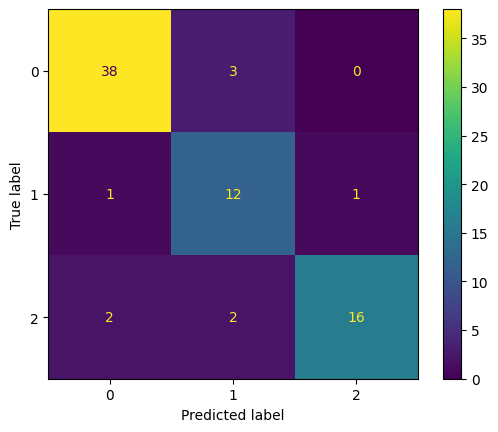

In [29]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
         'max_depth': [1,2,3, None]}

In [32]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, None],
                         'splitter': ['best', 'random']})

In [33]:
grid.best_estimator_, grid.best_score_

(DecisionTreeClassifier(max_depth=2), 0.8897175141242938)

In [34]:
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.80      0.86      0.83        14
           2       0.75      0.75      0.75        20

    accuracy                           0.85        75
   macro avg       0.83      0.84      0.83        75
weighted avg       0.85      0.85      0.85        75



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.86      0.86      0.86        14
           2       0.89      0.80      0.84        20

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75



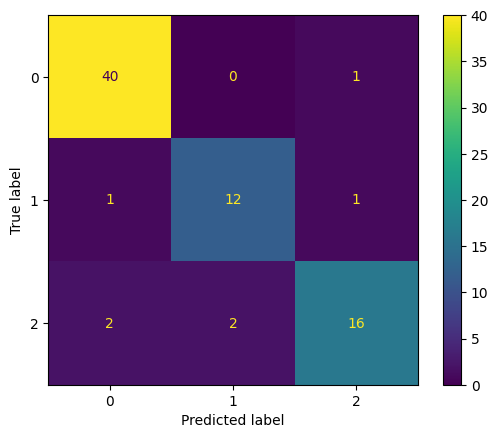

In [36]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_)
disp.plot()
